In [1]:
## Introduction

# Predictive analysis using machine learning.models are built on a real-world dataset to predict meaningful outcomes.
# This notebook focuses on predictive analysis using machine learning techniques.
# Build machine learning models using a real-world dataset to predict outcomes.
# This notebook demonstrates both Classification and Regression models,including feature selection, training, and evaluation.

In [2]:
# Data handling libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score

# Machine learning models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Load the Smart Education dataset
df = pd.read_csv(r"Smart_Education_Dataset.csv")

In [4]:
# Display first few rows
df.head(10)

,Student_ID,Age,Gender,Grade,Section,Average_Score,Math_Score,Science_Score,Language_Score,Exam_Attendance,...,Late_Coming,Participation_in_Activities,Disciplinary_Actions,Homework_Completion,Class_Engagement,Parent_Education_Level,Family_Income,Siblings_in_School,Parental_Involvement,Dropout_Risk
0,1,16,Male,9,B,76.11,41.04,61.30,93.04,1,...,2,2,2,69.02,Medium,High School,4591,3,Medium,High
1,2,13,Female,11,D,54.83,63.32,40.50,66.07,1,...,14,6,1,50.04,Medium,Graduate,5868,3,Medium,Low
2,3,14,Female,10,B,94.82,26.69,40.97,87.17,1,...,2,1,2,91.78,Low,Graduate,8803,1,Medium,High
3,4,16,Male,10,A,89.42,97.76,90.20,95.51,1,...,10,9,3,50.00,Low,Graduate,4718,0,Medium,Low
4,5,12,Female,9,A,57.97,52.88,44.92,91.19,1,...,11,9,3,90.39,High,High School,2739,3,Medium,High
5,6,17,Male,9,A,99.50,45.31,21.87,66.97,1,...,6,3,1,86.37,Low,High School,5675,2,Low,Low
6,7,14,Female,11,B,33.64,62.02,63.18,79.72,1,...,15,5,1,56.05,High,High School,3210,2,Medium,High
7,8,14,Female,8,D,85.20,25.20,97.67,77.70,1,...,8,6,2,81.02,High,High School,3261,1,Medium,High
8,9,16,Male,11,A,60.37,88.04,26.33,84.24,1,...,10,4,3,50.56,Low,Post-Graduate,3078,2,High,High
9,10,11,Male,8,C,60.33,56.82,42.90,38.31,1,...,6,1,2,61.18,Medium,High School,8760,0,Medium,High


In [5]:
# Display last few rows
df.tail(10)

,Student_ID,Age,Gender,Grade,Section,Average_Score,Math_Score,Science_Score,Language_Score,Exam_Attendance,...,Late_Coming,Participation_in_Activities,Disciplinary_Actions,Homework_Completion,Class_Engagement,Parent_Education_Level,Family_Income,Siblings_in_School,Parental_Involvement,Dropout_Risk
9990,9991,17,Other,9,A,75.48,65.67,64.88,43.08,1,...,9,9,4,67.38,Medium,High School,5374,1,High,High
9991,9992,13,Female,6,D,62.79,43.31,41.65,66.03,1,...,2,1,1,71.70,High,Graduate,5271,3,High,High
9992,9993,15,Male,6,B,81.03,87.12,45.40,25.32,1,...,15,6,3,99.85,High,Illiterate,6742,1,Medium,High
9993,9994,11,Male,9,C,34.39,82.82,96.02,41.07,1,...,0,2,2,58.13,Medium,Graduate,9180,1,Medium,High
9994,9995,13,Female,10,A,96.12,34.69,92.00,46.03,1,...,16,7,1,95.95,Low,Graduate,2202,2,High,High
9995,9996,13,Female,10,A,68.33,72.41,48.00,48.90,1,...,11,6,0,76.91,Low,Graduate,8778,2,High,High
9996,9997,12,Male,11,A,65.20,92.53,25.09,32.88,1,...,12,4,4,82.96,Low,Illiterate,3645,3,Medium,Low
9997,9998,15,Male,9,D,50.36,54.85,86.68,26.66,1,...,18,6,4,54.41,Medium,Illiterate,9397,3,Medium,High
9998,9999,15,Female,10,C,30.24,93.98,93.15,66.27,1,...,11,0,0,91.41,High,High School,6948,2,Medium,High
9999,10000,14,Male,11,B,34.29,21.76,87.00,59.31,1,...,18,7,3,54.47,High,Graduate,5909,1,High,High


In [6]:
# Check dataset shape (rows, columns)
df.shape

(10000, 24)

In [7]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Student_ID                   10000 non-null  int64  
 1   Age                          10000 non-null  int64  
 2   Gender                       10000 non-null  object 
 3   Grade                        10000 non-null  int64  
 4   Section                      10000 non-null  object 
 5   Average_Score                10000 non-null  float64
 6   Math_Score                   10000 non-null  float64
 7   Science_Score                10000 non-null  float64
 8   Language_Score               10000 non-null  float64
 9   Exam_Attendance              10000 non-null  int64  
 10  Assignments_Completed        10000 non-null  int64  
 11  Failed_Subjects              10000 non-null  int64  
 12  Attendance_Percentage        10000 non-null  float64
 13  Days_Absent      

In [8]:
# Check null values in each column
df.isnull().sum()

Student_ID                     0
Age                            0
Gender                         0
Grade                          0
Section                        0
Average_Score                  0
Math_Score                     0
Science_Score                  0
Language_Score                 0
Exam_Attendance                0
Assignments_Completed          0
Failed_Subjects                0
Attendance_Percentage          0
Days_Absent                    0
Late_Coming                    0
Participation_in_Activities    0
Disciplinary_Actions           0
Homework_Completion            0
Class_Engagement               0
Parent_Education_Level         0
Family_Income                  0
Siblings_in_School             0
Parental_Involvement           0
Dropout_Risk                   0
dtype: int64

In [9]:
# Student_ID is unique and not useful for prediction
df.drop(columns=["Student_ID","Siblings_in_School"], inplace=True)

In [10]:
# Checking whether that two columns deleted or not
df.head(5)

,Age,Gender,Grade,Section,Average_Score,Math_Score,Science_Score,Language_Score,Exam_Attendance,Assignments_Completed,...,Days_Absent,Late_Coming,Participation_in_Activities,Disciplinary_Actions,Homework_Completion,Class_Engagement,Parent_Education_Level,Family_Income,Parental_Involvement,Dropout_Risk
0,16,Male,9,B,76.11,41.04,61.30,93.04,1,12,...,19,2,2,2,69.02,Medium,High School,4591,Medium,High
1,13,Female,11,D,54.83,63.32,40.50,66.07,1,11,...,7,14,6,1,50.04,Medium,Graduate,5868,Medium,Low
2,14,Female,10,B,94.82,26.69,40.97,87.17,1,4,...,33,2,1,2,91.78,Low,Graduate,8803,Medium,High
3,16,Male,10,A,89.42,97.76,90.20,95.51,1,18,...,18,10,9,3,50.00,Low,Graduate,4718,Medium,Low
4,12,Female,9,A,57.97,52.88,44.92,91.19,1,7,...,47,11,9,3,90.39,High,High School,2739,Medium,High


In [11]:
# Convert categorical columns into numeric form
label_encoder = LabelEncoder()

categorical_cols = df.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [12]:
# Checking whether all columns are in numeric form
df.head(5)

,Age,Gender,Grade,Section,Average_Score,Math_Score,Science_Score,Language_Score,Exam_Attendance,Assignments_Completed,...,Days_Absent,Late_Coming,Participation_in_Activities,Disciplinary_Actions,Homework_Completion,Class_Engagement,Parent_Education_Level,Family_Income,Parental_Involvement,Dropout_Risk
0,16,1,9,1,76.11,41.04,61.30,93.04,1,12,...,19,2,2,2,69.02,2,1,4591,2,0
1,13,0,11,3,54.83,63.32,40.50,66.07,1,11,...,7,14,6,1,50.04,2,0,5868,2,1
2,14,0,10,1,94.82,26.69,40.97,87.17,1,4,...,33,2,1,2,91.78,1,0,8803,2,0
3,16,1,10,0,89.42,97.76,90.20,95.51,1,18,...,18,10,9,3,50.00,1,0,4718,2,1
4,12,0,9,0,57.97,52.88,44.92,91.19,1,7,...,47,11,9,3,90.39,0,1,2739,2,0


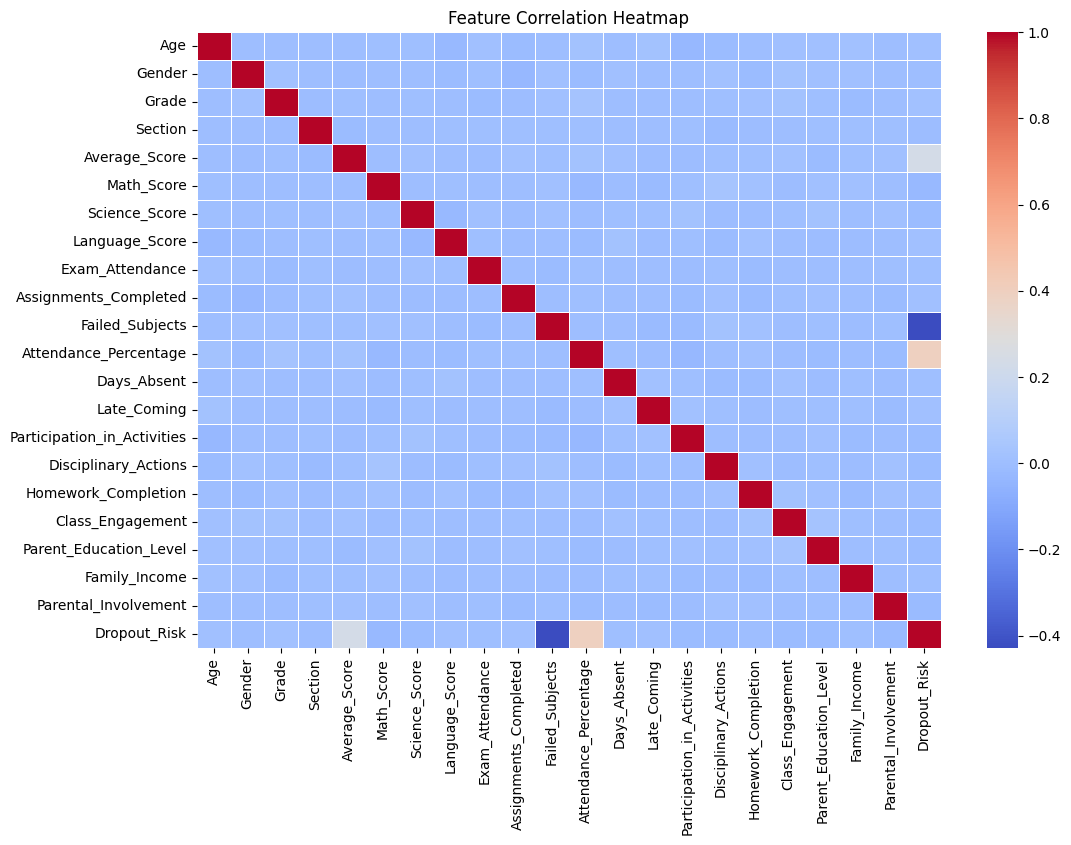

In [13]:
# Correlation matrix to understand feature importance
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [14]:
# PART A: CLASSIFICATION MODEL
# Predicting Dropout_Risk

In [15]:
# Target variable
y_class = df["Dropout_Risk"]

# Feature variables
X_class = df.drop(columns=["Dropout_Risk"])

In [16]:
# Creating Train-Test Split for Classification
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [17]:
# Feature Scaling of classification
scaler = StandardScaler()

Xc_train = scaler.fit_transform(Xc_train)
Xc_test = scaler.transform(Xc_test)

In [18]:
# Initialize Logistic Regression model
log_model = LogisticRegression(max_iter=1000)

# Train the model
log_model.fit(Xc_train, yc_train)

LogisticRegression(max_iter=1000)

In [19]:
# Make predictions
yc_pred = log_model.predict(Xc_test)

# Accuracy score
accuracy_score(yc_test, yc_pred)

# Detailed classification report
print(classification_report(yc_test, yc_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1650
           1       0.75      0.71      0.73       350

    accuracy                           0.91      2000
   macro avg       0.84      0.83      0.84      2000
weighted avg       0.91      0.91      0.91      2000



In [20]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=1)
rf_model.fit(Xc_train, yc_train)

rf_pred = rf_model.predict(Xc_test)

accuracy_score(yc_test, rf_pred)

0.9985

In [21]:
# Analyze feature importance using Random Forest
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X_class.columns
).sort_values(ascending=False)

feature_importance.head(10)

Failed_Subjects                0.369269
Attendance_Percentage          0.331342
Average_Score                  0.174180
Family_Income                  0.015073
Math_Score                     0.014789
Science_Score                  0.014084
Homework_Completion            0.012350
Language_Score                 0.010707
Assignments_Completed          0.008781
Participation_in_Activities    0.008641
dtype: float64

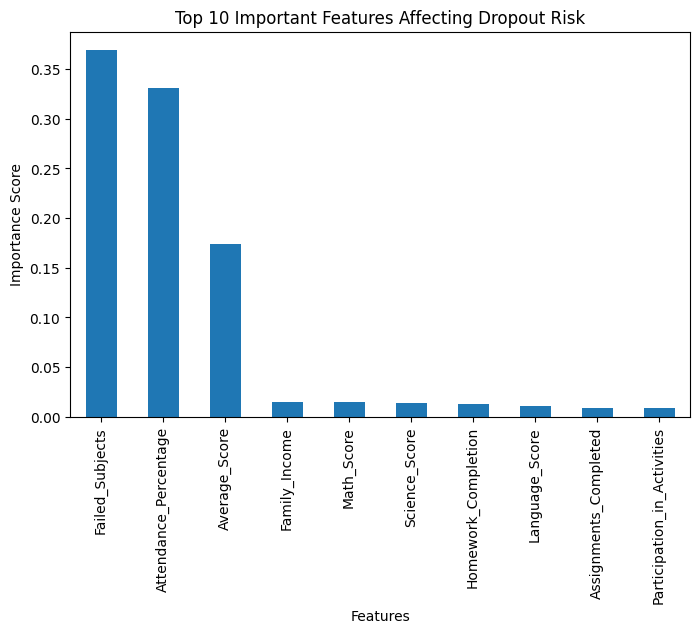

In [22]:
# Visualize top important features
plt.figure(figsize=(8, 5))
feature_importance.head(10).plot(kind="bar")
plt.title("Top 10 Important Features Affecting Dropout Risk")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()

In [23]:
# Perform cross-validation to check model stability
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    log_model, Xc_train, yc_train, cv=5, scoring="accuracy"
)

cv_scores, cv_scores.mean()

(array([0.906875, 0.915625, 0.918125, 0.9125  , 0.914375]), 0.9135)

In [24]:
# PART B: REGRESSION MODEL
# Predicting Average_Score

In [25]:
# Target variable
y_reg = df["Average_Score"]

# Feature variables
X_reg = df.drop(columns=["Average_Score"])

In [26]:
# Creating Train-Test Split for Regression
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [27]:
# Feature Scaling of Regression
Xr_train = scaler.fit_transform(Xr_train)
Xr_test = scaler.transform(Xr_test)

In [28]:
# Initialize Linear Regression model
lin_model = LinearRegression()

# Train the model
lin_model.fit(Xr_train, yr_train)

LinearRegression()

In [29]:
# Make predictions
yr_pred = lin_model.predict(Xr_test)

# Mean Squared Error
mse = mean_squared_error(yr_test, yr_pred)

# R-squared value
r2 = r2_score(yr_test, yr_pred)

mse, r2

(368.48588125939375, 0.08989608052906584)

In [30]:
# Summarize regression performance
performance_summary = {
    "Mean Squared Error": mse,
    "R-Squared Score": r2
}

performance_summary

{'Mean Squared Error': 368.48588125939375,
 'R-Squared Score': 0.08989608052906584}

In [31]:
# Train Linear Regression model
lin_model = LinearRegression()
lin_model.fit(Xc_train, yc_train)

# Predict continuous values
lin_pred_cont = lin_model.predict(Xc_test)

# Convert predictions to class labels
lin_pred = np.round(lin_pred_cont).astype(int)

# Calculate accuracy
lin_accuracy = accuracy_score(yc_test, lin_pred)

lin_accuracy


0.903

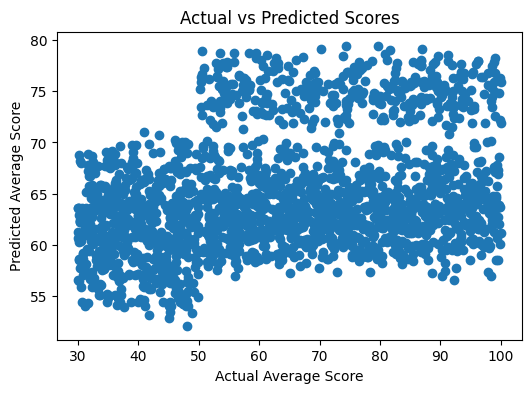

In [32]:
plt.figure(figsize=(6, 4))
plt.scatter(yr_test, yr_pred)
plt.xlabel("Actual Average Score")
plt.ylabel("Predicted Average Score")
plt.title("Actual vs Predicted Scores")
plt.show()


In [ ]:
# Compare Logistic Regression vs Random Forest vs Linear Regression
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest","Linear Regression"],
    "Accuracy": [
        accuracy_score(yc_test, yc_pred),
        accuracy_score(yc_test, rf_pred),
        accuracy_score(yc_test, lin_pred)
    ]
})

comparison

,Model,Accuracy
0,Logistic Regression,0.9080
1,Random Forest,0.9985
2,Linear Regression,0.9030


In [34]:
# Conclusion:

# - This task demonstrates end-to-end predictive analysis using machine learning.
# - Both classification and regression models were implemented and evaluated.
# - Classification models successfully predicted student Dropout Risk.
# - Regression model accurately predicted student Average Scores.
# - Additional analysis such as feature importance, cross-validation, simulations strengthen the reliability and scalability of the solution.
# - The approach is applicable to real-world education analytics platforms.